In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/flight_data.csv")

df_sea = df[df["Dest"] == "SEA"]

top5_airlines = (
    df_sea.groupby("Airline Name")
          .size()
          .reset_index(name="Flight_Count")
          .sort_values("Flight_Count", ascending=False)
          .head(5)
)

num_days = df_sea["Date"].nunique()

for _, row in top5_airlines.iterrows():
    avg_daily = math.ceil(row["Flight_Count"] / num_days)

    print(f"Airline: {row['Airline Name']}")
    print(f"Flight_Count: {row['Flight_Count']}")
    print(f"Average Flights per Day: {avg_daily}\n")

Airline: Alaska Airlines
Flight_Count: 263371
Average Flights per Day: 207

Airline: Delta
Flight_Count: 110030
Average Flights per Day: 87

Airline: SkyWest Airlines
Flight_Count: 85755
Average Flights per Day: 68

Airline: Horizon Air
Flight_Count: 77239
Average Flights per Day: 61

Airline: United Airlines
Flight_Count: 29882
Average Flights per Day: 24



In [ ]:
df_top5 = df_sea[df_sea["Airline Name"].isin(top5_airlines["Airline Name"].to_list())]
df_top5 = df_top5.dropna(subset=["Delay", "Cancelled"])
print(df_top5.head())

delay_stats = (
    df_top5.groupby("Airline Name")["Delay"]
    .mean()
    .reset_index(name="Average_Delay")
)

cancel_stats = (
    df_top5.groupby("Airline Name")["Cancelled"]
    .sum()
    .reset_index(name="Cancelled_Flights")
)

print("\nAverage Delay for Top 5 Airlines:")
print(delay_stats)

           Date Carrier     Airline Name  Flight_Num Origin Dest  Dep_Time  \
3570  6/30/2025      AS  Alaska Airlines         1.0    DCA  SEA       800   
3572  6/30/2025      AS  Alaska Airlines       100.0    ANC  SEA      1141   
3575  6/30/2025      AS  Alaska Airlines      1006.0    PHX  SEA      1355   
3579  6/30/2025      AS  Alaska Airlines      1011.0    GEG  SEA      1323   
3580  6/30/2025      AS  Alaska Airlines      1016.0    PDX  SEA      1325   

      Actual_Dep  Delay  Cancelled  
3570       754.0   -6.0          0  
3572      1137.0   -4.0          0  
3575      1357.0    2.0          0  
3579      1342.0   19.0          0  
3580      1419.0   54.0          0  

Average Delay for Top 5 Airlines:
       Airline Name  Average_Delay
0   Alaska Airlines       6.827346
1             Delta       9.575044
2       Horizon Air       5.684626
3  SkyWest Airlines       4.378430
4   United Airlines      12.578576


/tmp/ipython-input-544912608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=delay_stats, x="Airline Name", y="Average_Delay", palette="Blues_r")
/tmp/ipython-input-544912608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=cancel_stats, x="Airline Name", y="Cancelled_Flights", palette="Reds_r")
/tmp/ipython-input-544912608.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-544912608.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

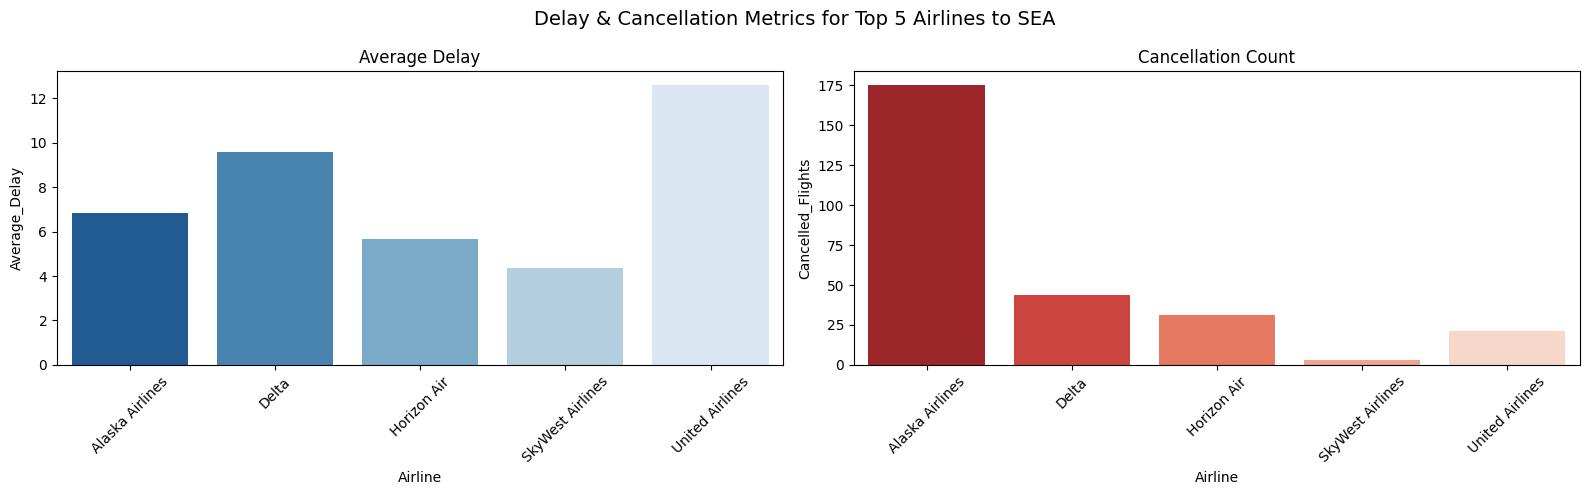

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

sns.barplot(ax=axes[0], data=delay_stats, x="Airline Name", y="Average_Delay", palette="Blues_r")
axes[0].set_title("Average Delay")

sns.barplot(ax=axes[1], data=cancel_stats, x="Airline Name", y="Cancelled_Flights", palette="Reds_r")
axes[1].set_title("Cancellation Count")

for ax in axes:
    ax.set_xlabel("Airline")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.suptitle("Delay & Cancellation Metrics for Top 5 Airlines to SEA", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
top_origins = (
    df_sea.groupby("Origin")
          .size()
          .reset_index(name="Flight_Count")
          .sort_values("Flight_Count", ascending=False)
          .head(10)
)

print("\nTop 10 Most Popular Origins for Flights to SEA from 2022 - 2025:")
print(top_origins)


Top 10 Most Popular Origins for Flights to SEA from 2022 - 2025:
   Origin  Flight_Count
72    PDX         27640
2     ANC         25645
52    LAX         25472
74    PHX         24199
34    GEG         23850
88    SFO         23518
51    LAS         23082
22    DEN         22480
8     BOI         19126
71    ORD         17173


In [ ]:
top_origin_list = top_origins["Origin"].tolist()

df_top = df_sea[df_sea["Origin"].isin(top_origin_list)].copy()
df_top["Date"] = pd.to_datetime(df_top["Date"])

# Monthly average flight count
monthly_counts = (
    df_top.groupby(["Origin", pd.Grouper(key="Date", freq="ME")])
          .size()
          .reset_index(name="Monthly_Count")
)

monthly_avg = (
    monthly_counts.groupby("Origin")["Monthly_Count"]
                  .mean()
                  .apply(np.ceil)
                  .reset_index(name="Avg_Monthly_Flights")
)

top_airlines = (
    df_top.groupby(["Origin", "Airline Name"])
          .size()
          .reset_index(name="Flight_Count")
)

print("=== Average Monthly Flight Count for Top Origin Cities ===")
print(monthly_avg.to_string(index=False))


=== Average Monthly Flight Count for Top Origin Cities ===
Origin  Avg_Monthly_Flights
   ANC                611.0
   BOI                456.0
   DEN                536.0
   GEG                568.0
   LAS                550.0
   LAX                607.0
   ORD                409.0
   PDX                659.0
   PHX                577.0
   SFO                560.0


In [ ]:
# Top 3 airlines for each origin
top3_airlines = (
    top_airlines.sort_values(["Origin", "Flight_Count"], ascending=[True, False])
                .groupby("Origin")
                .head(3)
                .reset_index(drop=True)
)
print("\n=== Top 3 Airlines for Each Origin City ===")
for origin in top3_airlines["Origin"].unique():
    subset = top3_airlines[top3_airlines["Origin"] == origin]
    print(f"\nOrigin: {origin}")
    print(subset[["Airline Name", "Flight_Count"]].to_string(index=False))



=== Top 3 Airlines for Each Origin City ===

Origin: ANC
   Airline Name  Flight_Count
Alaska Airlines         19681
          Delta          5593
    Horizon Air           334

Origin: BOI
    Airline Name  Flight_Count
SkyWest Airlines         10771
     Horizon Air          5962
 Alaska Airlines          2359

Origin: DEN
   Airline Name  Flight_Count
United Airlines          6637
Alaska Airlines          5403
      Southwest          5174

Origin: GEG
    Airline Name  Flight_Count
SkyWest Airlines         10476
     Horizon Air          6782
 Alaska Airlines          5683

Origin: LAS
   Airline Name  Flight_Count
Alaska Airlines          9359
          Delta          6083
      Southwest          3487

Origin: LAX
    Airline Name  Flight_Count
 Alaska Airlines         11808
           Delta          7668
SkyWest Airlines          3201

Origin: ORD
   Airline Name  Flight_Count
Alaska Airlines          6318
United Airlines          5169
          Delta          3180

Origin: PDX